<a href="https://colab.research.google.com/github/KeneKing12/Kenechukwu/blob/main/Lab_6__Kenechukwu_K_Odoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [3]:
import pandas as pd
import numpy as np

#Load the California Housing Dataset

In [13]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California housing dataset
california_data = fetch_california_housing()

# Convert to a DataFrame for easier handling
data = pd.DataFrame(california_data.data, columns=california_data.feature_names)

# Add the target (housing prices) as a new column
data['MedHouseVal'] = california_data.target

# Display the first few rows of the dataset
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


We will use the California Housing dataset from the sklearn library. We'll focus on the following features:

longitude
latitude
median_income

#Apply K-Means Clustering

K-Means clustering is applied to the dataset for a range of k values. We'll begin by choosing a range of k values from 5 to 10 and calculate silhouette scores for each to find the optimal number of clusters.

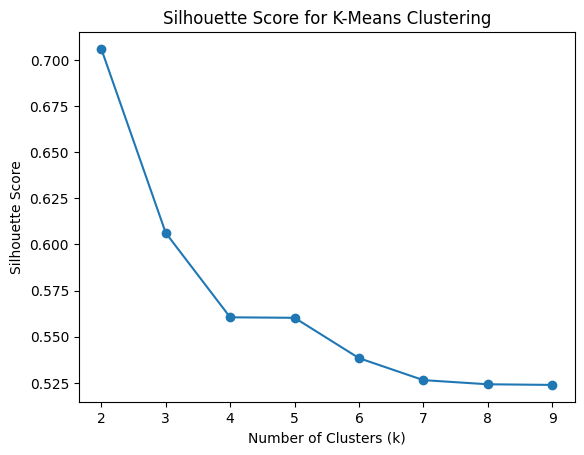

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'data' is your original dataset (unscaled)
sil_scores = []
k_values = range(2, 10)

# Apply K-Means clustering for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    sil_scores.append(silhouette_avg)

# Plot silhouette scores for different k values
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [17]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of k values
k_values = range(2, 10)

# Initialize an empty list to store silhouette scores
sil_scores = []

# Loop through each k value, apply K-Means, and calculate the silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)  # Fit the model on the original data
    cluster_labels = kmeans.labels_  # Get cluster labels for each point
    silhouette_avg = silhouette_score(data, cluster_labels)  # Calculate silhouette score
    sil_scores.append(silhouette_avg)

# Print silhouette scores for each k value
for k, score in zip(k_values, sil_scores):
    print(f"For k = {k}, the silhouette score is {score:.4f}")


For k = 2, the silhouette score is 0.7060
For k = 3, the silhouette score is 0.6063
For k = 4, the silhouette score is 0.5605
For k = 5, the silhouette score is 0.5603
For k = 6, the silhouette score is 0.5384
For k = 7, the silhouette score is 0.5265
For k = 8, the silhouette score is 0.5242
For k = 9, the silhouette score is 0.5239


#Optimize the Number of Clusters using Silhouette Score

After plotting the silhouette scores, select the k value with the highest silhouette score as the optimal number of clusters for K-Means.

In [18]:
optimal_k = k_values[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")


Optimal number of clusters based on silhouette score: 2


#Optimize the Number of Clusters using Elbow Method

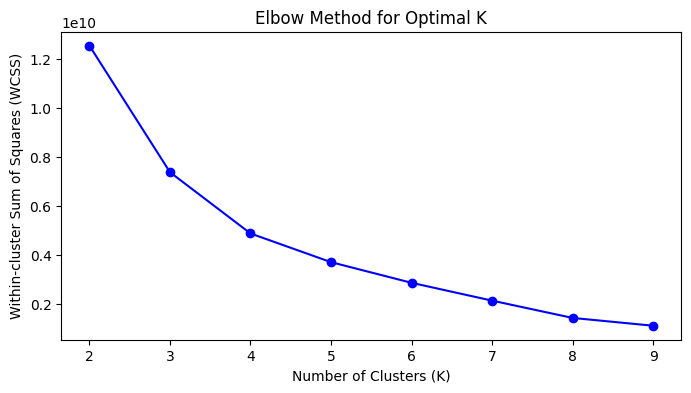

In [22]:
# Import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# Load the California housing dataset
california_data = fetch_california_housing()
data = pd.DataFrame(california_data.data, columns=california_data.feature_names)

# Assign the data to X (all features in the dataset)
X = data.values  # Convert DataFrame to numpy array if needed

# Elbow Method
wcss = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), wcss, marker='o', linestyle='-', color='b')  # Use range(2, 10) to match the wcss list length
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


#Analyze and Visualize Clustering Results

Next, we'll fit the K-Means model with the optimal number of clusters and visualize the results using scatter plots.

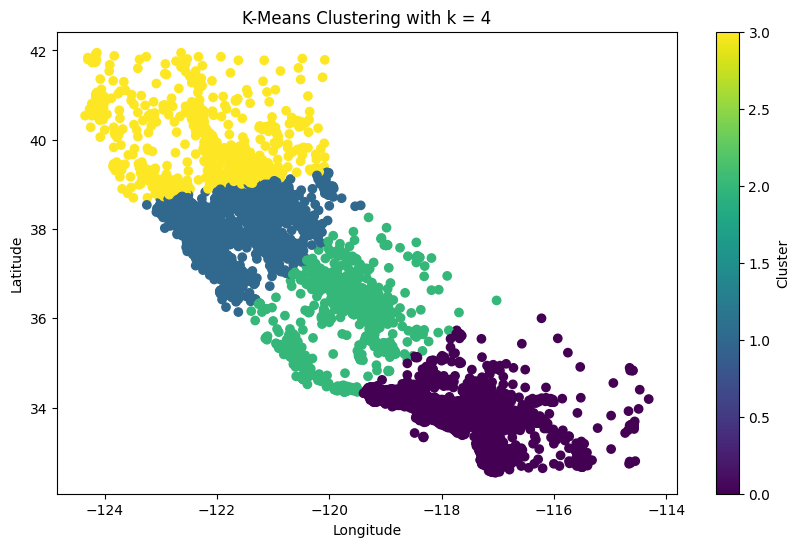

In [24]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load California housing dataset and create a DataFrame
california_data = fetch_california_housing()
df = pd.DataFrame(california_data.data, columns=california_data.feature_names)

# Set 'optimal_k' to a chosen value based on the elbow method
optimal_k = 4  # Replace this with the optimal k found in your analysis

# Apply K-Means with the chosen optimal k on longitude and latitude columns
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df[['Longitude', 'Latitude']])  # Fit directly on longitude and latitude data
df['Cluster'] = kmeans.labels_

# Plot the clusters based on longitude and latitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title(f"K-Means Clustering with k = {optimal_k}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()



# Analyzing the distribution of median_income across clusters.

Cluster
0    3.986188
1    4.103348
2    3.020481
3    2.552743
Name: MedInc, dtype: float64


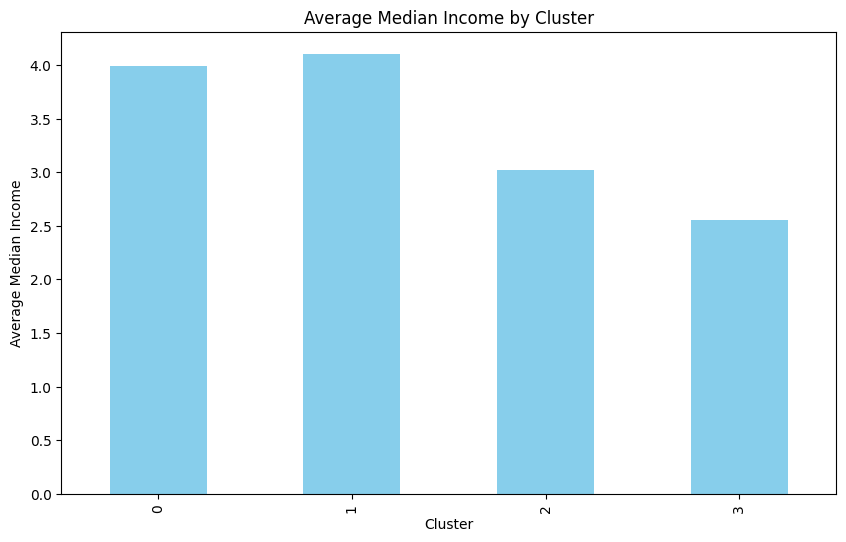

In [25]:
# Analyze the distribution of median_income per cluster
income_cluster_means = df.groupby('Cluster')['MedInc'].mean()
print(income_cluster_means)

# Visualizing median income across clusters
plt.figure(figsize=(10, 6))
income_cluster_means.plot(kind='bar', color='skyblue')
plt.title('Average Median Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Median Income')
plt.show()


#Comparison with Other Clustering Algorithms such as DBSCAN

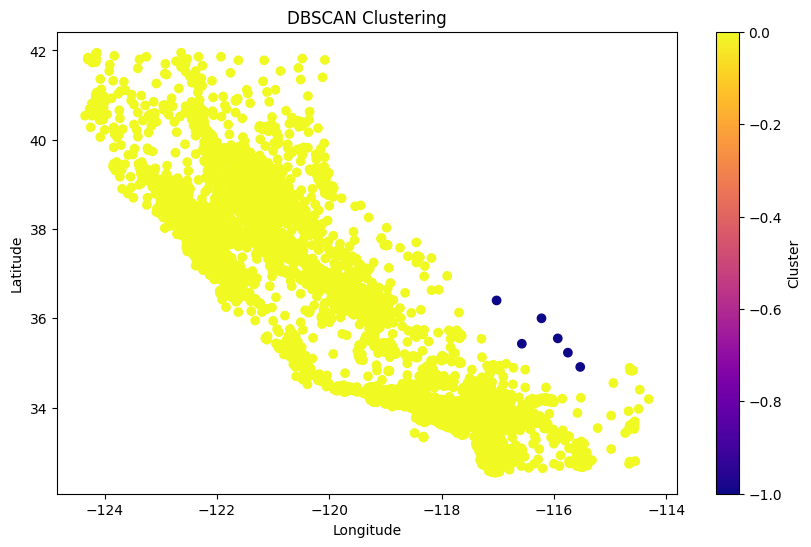

In [26]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df[['Longitude', 'Latitude']])  # Fit directly on longitude and latitude data
df['DBSCAN_Cluster'] = dbscan.labels_

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['DBSCAN_Cluster'], cmap='plasma', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Compare the results of K-Means and DBSCAN
